# Średnie kroczące i inne operacje w oknach

In [1]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf  # Do świec (candlestick)
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.io as pio



In [8]:
def get_binance_data(symbol="BTCUSDT", interval="5m", limit=50):
    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"
    response = requests.get(url)
    data = response.json()
    
    df = pd.DataFrame(data, columns=["timestamp", "open", "high", "low", "close", "volume", "_", "_", "_", "_", "_", "_"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")  # Konwersja na datę
    df[["open", "high", "low", "close"]] = df[["open", "high", "low", "close"]].astype(float)  # Zamiana na liczby
    return df

df = get_binance_data()


# mpf.plot(df.set_index("timestamp"), type="candle", style="charles", title="Bitcoin - świeczki", ylabel="Cena (USDT)")


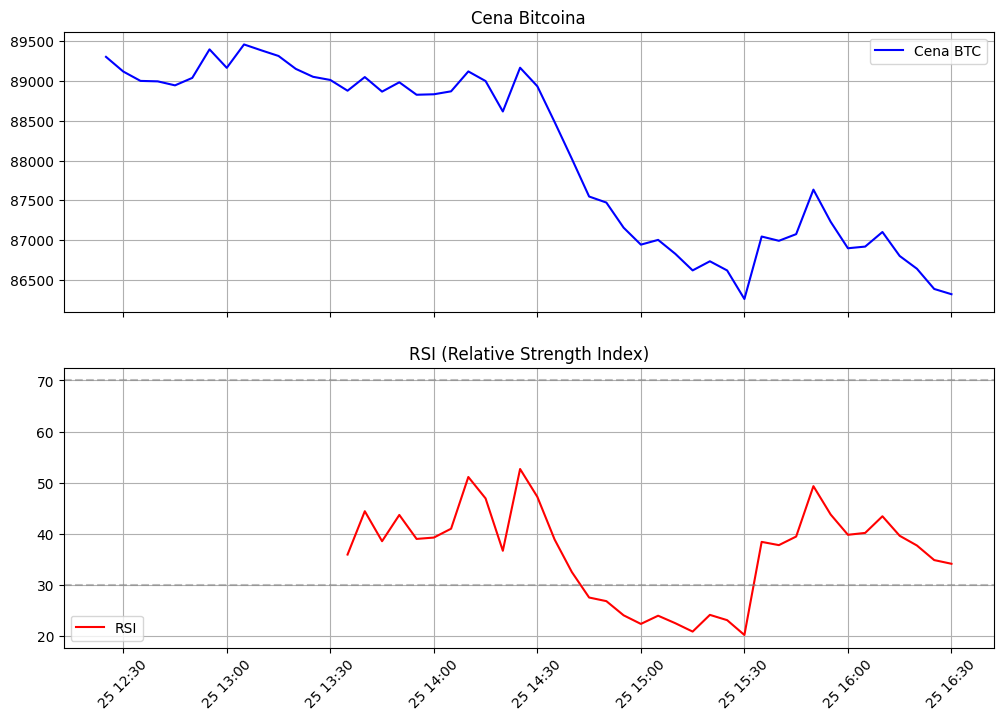

In [9]:
# Oblicz RSI
df["rsi"] = ta.rsi(df["close"], length=14)

# Tworzenie wykresu
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Wykres ceny
ax[0].plot(df["timestamp"], df["close"], label="Cena BTC", color="blue")
ax[0].set_title("Cena Bitcoina")
ax[0].legend()
ax[0].grid()

# Wykres RSI
ax[1].plot(df["timestamp"], df["rsi"], label="RSI", color="red")
ax[1].axhline(70, color="gray", linestyle="--", alpha=0.5)  # Poziom wykupienia
ax[1].axhline(30, color="gray", linestyle="--", alpha=0.5)  # Poziom wyprzedania
ax[1].set_title("RSI (Relative Strength Index)")
ax[1].legend()
ax[1].grid()

plt.xticks(rotation=45)  # Obrócenie dat dla lepszej widoczności
plt.show()

In [10]:
fig = go.Figure(data=[go.Candlestick(
    x=df["timestamp"],
    open=df["open"],
    high=df["high"],
    low=df["low"],
    close=df["close"],
)])
pio.renderers.default = "vscode"
fig.update_layout(title="Bitcoin Candlestick Chart", xaxis_title="Data", yaxis_title="Cena (USDT)")
fig.show()

In [ ]:
def get_binance_BNB(symbol="BNBUSDT", interval="5m", limit=50):
    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"
    response = requests.get(url)
    data = response.json()
    
    df = pd.DataFrame(data, columns=["timestamp", "open", "high", "low", "close", "volume", "_", "_", "_", "_", "_", "_"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")  # Konwersja na datę
    df[["open", "high", "low", "close"]] = df[["open", "high", "low", "close"]].astype(float)  # Zamiana na liczby
    return df

df = get_binance_BNB()

In [4]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
# Twój adres portfela BSC
wallet_address = "0xff494b777A795B6Eed2fc245acee43F4dD3B456E"

# Twój klucz API z BSCScan
api_key = "VC142F8ZFU9TX5FFMHUY1S1W3RATWF89AV"

# API URL do pobrania salda
url = f"https://api.bscscan.com/api?module=account&action=balance&address={wallet_address}&tag=latest&apikey={api_key}"

# Wysłanie zapytania do BSCScan
response = requests.get(url)

# Pobieranie danych z odpowiedzi
data = response.json()
bnbusdt = get_binance_BNB()
# Sprawdzanie, czy odpowiedź zawiera błąd
if data["status"] == "1":
    # Pobieranie salda w Wei i konwertowanie na BNB
    balance_wei = int(data["result"])
    balance_bnb = balance_wei / 10**18  # Konwersja z Wei na BNB
    print(f"Saldo portfela  wynosi: {balance_bnb} BNB")
else:
    # Jeśli wystąpił błąd, wyświetl go
    print(f"Błąd: {data['message']}")

# Get the current date (today)
current_date = datetime.now().strftime('%Y-%m-%d')

# Track the balance for each run
timestamps = [current_date]  # Use the current date each time the code runs
balances = [balance_bnb]  # Add the balance for the current run

# Clearing the previous figure before updating it
plt.clf()

# Plotting the updated data
plt.plot(timestamps, balances, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('BNB Balance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('BNB Balance', fontsize=12)

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'get_binance_BNB' is not defined